# **This is for setup**

In [37]:
# data processing
import glob
import os

# data manipulation
import pandas as pd
import numpy as np
import os

# text analysis tools
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import preprocessing
from nltk import SnowballStemmer
import string
import random

# visualization tools
import matplotlib as mplib
import matplotlib.pyplot as plt 
import seaborn as sns  

In [38]:
# Set path to data
Path =  "/Users/fionayu/Desktop/PADM-GP_2505/Data"
# Set seed
random.seed(2502)



In [39]:
# use the chdir function from the os package to sed your working directory 
os.chdir(Path + "/Abstracts")

In [4]:
# Generate an empty dataframe that will hold all the patent data we have
all_abstracts = pd.DataFrame([])

# Now loop through each file in the folder that starts with RePORTER
# Read that file using only the columns we need
# And append it to the dataframe that we created above
# This might take a little while to run (no more than 1 minute)
for counter, file in enumerate(glob.glob("RePORTER*?")):
    print(counter,file)
    projects = pd.read_csv(file, usecols=['APPLICATION_ID','ABSTRACT_TEXT'], 
                           encoding='latin-1')
    all_abstracts = all_abstracts.append(projects)
    
# View the first 5 observations 
all_abstracts.head()


0 RePORTER_PRJABS_C_FY2019_new.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


1 RePORTER_PRJABS_C_FY2018_new.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


2 RePORTER_PRJABS_C_FY2021.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


3 RePORTER_PRJABS_C_FY2017_new.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


4 RePORTER_PRJABS_C_FY2014.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


5 RePORTER_PRJABS_C_FY2012.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


6 RePORTER_PRJABS_C_FY2020_new.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


7 RePORTER_PRJABS_C_FY2013.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


8 RePORTER_PRJABS_C_FY2016_new.csv


/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/4160511429.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_abstracts = all_abstracts.append(projects)


,APPLICATION_ID,ABSTRACT_TEXT
0,9988954,The NICHD's Contraceptive Clinical Trials (CCT...
1,9977043,This contract provides for the development and...
2,9694995,PROJECT SUMMARY Control of gene expression hol...
3,9673747,Project Summary / Abstract The ubiquitin-prot...
4,9686741,? DESCRIPTION (provided by applicant): Stra...


In [5]:
# Save file

all_abstracts.to_csv('all_abstracts.csv')


In [6]:
# Merge with autism data by application ID

all_autism = pd.read_csv(r'../Projects/autism_projects.csv')

all_autism_abstract = pd.merge(all_abstracts, all_autism, on="APPLICATION_ID", how = 'right')

all_autism_abstract.to_csv('all_autism_abstracts.csv')

In [7]:
# Import and process data

abs = pd.read_csv('all_autism_abstracts.csv')

# Drop the projects with missing abstracts
abs = abs.dropna(subset = ['ABSTRACT_TEXT'])

abs.shape

(4928, 48)

In [8]:
# Process specifc text data

abstracts = abs.ABSTRACT_TEXT.values.tolist()

abstracts[0]
# abstacts = abstracts.PHR
# abstracts = abstracts.PROJECT_TERMS
# abstracts = abstracts.PROJECT_TITLE

"DESCRIPTION (provided by applicant): This proposal is designed to facilitate career development of Jeffrey Anderson, MD PhD as an independent investigator to conduct longitudinal neuroimaging studies of functional MR connectivity in neurodevelopmental and neuropsychiatric disorders, with particular expertise in functional connectivity abnormalities in autism. Although the applicant has extensive mentored research experience during PhD training in electrophysiology of the brain, and extensive neuroradiological training in functional imaging methods, he has not had experience conducting large clinical imaging investigations, requiring patient recruitment and assessment and multivariate statistical analysis of large imaging datasets. The specific research aims of this proposal develop these skills   through a longitudinal study of functional connectivity in autism. There is now extensive evidence that   functional connectivity abnormalities between brain regions are present in autism, wh

# Vectorizing Text

In [40]:
stemmer = SnowballStemmer("english")

translator=str.maketrans(string.punctuation, ' ' * len(string.punctuation))

# After
abstracts[0].translate(translator)


'DESCRIPTION  provided by applicant   This proposal is designed to facilitate career development of Jeffrey Anderson  MD PhD as an independent investigator to conduct longitudinal neuroimaging studies of functional MR connectivity in neurodevelopmental and neuropsychiatric disorders  with particular expertise in functional connectivity abnormalities in autism  Although the applicant has extensive mentored research experience during PhD training in electrophysiology of the brain  and extensive neuroradiological training in functional imaging methods  he has not had experience conducting large clinical imaging investigations  requiring patient recruitment and assessment and multivariate statistical analysis of large imaging datasets  The specific research aims of this proposal develop these skills   through a longitudinal study of functional connectivity in autism  There is now extensive evidence that   functional connectivity abnormalities between brain regions are present in autism  wh

In [41]:

# Tokenizing

def tokenize(text):
    translator=str.maketrans(string.punctuation, ' '*len(string.punctuation)) # translator that replaces punctuation with empty spaces
    return [stemmer.stem(i) for i in text.translate(translator).split()]


tokenize(abstracts[0])


['descript',
 'provid',
 'by',
 'applic',
 'this',
 'propos',
 'is',
 'design',
 'to',
 'facilit',
 'career',
 'develop',
 'of',
 'jeffrey',
 'anderson',
 'md',
 'phd',
 'as',
 'an',
 'independ',
 'investig',
 'to',
 'conduct',
 'longitudin',
 'neuroimag',
 'studi',
 'of',
 'function',
 'mr',
 'connect',
 'in',
 'neurodevelopment',
 'and',
 'neuropsychiatr',
 'disord',
 'with',
 'particular',
 'expertis',
 'in',
 'function',
 'connect',
 'abnorm',
 'in',
 'autism',
 'although',
 'the',
 'applic',
 'has',
 'extens',
 'mentor',
 'research',
 'experi',
 'dure',
 'phd',
 'train',
 'in',
 'electrophysiolog',
 'of',
 'the',
 'brain',
 'and',
 'extens',
 'neuroradiolog',
 'train',
 'in',
 'function',
 'imag',
 'method',
 'he',
 'has',
 'not',
 'had',
 'experi',
 'conduct',
 'larg',
 'clinic',
 'imag',
 'investig',
 'requir',
 'patient',
 'recruit',
 'and',
 'assess',
 'and',
 'multivari',
 'statist',
 'analysi',
 'of',
 'larg',
 'imag',
 'dataset',
 'the',
 'specif',
 'research',
 'aim',
 'of

    "In language processing, the vectors x are derived from textual data, 
    in order to reflect various linguistic properties of the text." 
    — Page 65, Neural Network Methods in Natural Language Processing, 2017.

This is called feature extraction or feature encoding.

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

1.   A vocabulary of known words.
2.   A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [42]:

vectorizer = CountVectorizer(analyzer= "word", # unit of features are single words rather then phrases of words 
                            tokenizer=tokenize, # function to create tokens
                            ngram_range=(0,1),
                            strip_accents='unicode',
                            min_df = 0.05,
                            max_df = 0.95)


In [43]:
bag_of_words = vectorizer.fit_transform(abstracts) #transform our corpus is a bag of words 

In [ ]:
#print(bag_of_words[0])

A very common feature extraction procedures for sentences and documents is the bag-of-words approach (BOW). In this approach, we look at the histogram of the words within the text, i.e. considering each word count as a feature.

— Page 69, Neural Network Methods in Natural Language Processing, 2017.

In [44]:
features = vectorizer.get_feature_names_out() #Convert a collection of text documents to a matrix of token counts.

features[0:10]

array(['000', '1', '10', '12', '18', '2', '20', '24', '3', '30'],
      dtype=object)

# Latent Dirichlet Allocation

Now that we have our bag of words, we can start using it for models such as Latent Dirichlet Allocation.

Latent Dirichlet Allocation is a generative probabilistic model for collections of discrete dataset such as text corpora. It is also a topic model that is used for discovering abstract topics from a collection of documents.

In [45]:
### Latent Dirichlet Allocation

lda = LatentDirichletAllocation(learning_method='online') 

doctopic = lda.fit_transform( bag_of_words)

doctopic

### First LDA fit

array([[4.80882336e-04, 4.80885141e-04, 7.75132786e-01, ...,
        4.80911365e-04, 4.80877606e-04, 4.80865626e-04],
       [6.25173100e-04, 5.86371956e-01, 6.25144819e-04, ...,
        1.00630012e-01, 6.25208413e-04, 6.25163269e-04],
       [6.79709465e-02, 1.74666284e-01, 1.66665296e-01, ...,
        1.95986442e-01, 2.05725286e-01, 3.08738504e-04],
       ...,
       [3.43918549e-01, 3.14544868e-04, 3.14536116e-04, ...,
        3.14540650e-04, 4.86695374e-01, 3.14532766e-04],
       [3.10642536e-04, 2.87930138e-02, 3.10657725e-04, ...,
        6.40909379e-01, 3.10631014e-04, 3.10656358e-04],
       [4.31142942e-04, 4.31171258e-04, 4.31153201e-04, ...,
        4.31146112e-04, 5.36637950e-01, 5.30828005e-02]])

In [46]:
from nltk.corpus import stopwords

# Download most current stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words[0:10]


stop = stop_words + ['provid', 'use', 'studi', 'research', 'asd', 'behavior','hypothes', 'aim', 'program', 'abstract', 'project', 'e', 'g']

# Tokenize stop words to match
eng_stopwords = [tokenize(s)[0] for s in stop]



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fionayu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Check results after adding stop words

vectorizer = CountVectorizer(analyzer= "word", # unit of features are single words rather then phrases of words 
                            tokenizer=tokenize, # function to create tokens
                            ngram_range=(0,1),
                            strip_accents='unicode',
                            stop_words=eng_stopwords,
                            min_df = 0.05,
                            max_df = 0.95)

# Creating bag of words
bag_of_words = vectorizer.fit_transform(abstracts) #transform our corpus is a bag of words 
features = vectorizer.get_feature_names_out()

# Fitting LDA model
lda = LatentDirichletAllocation(n_components = 7, learning_method='online') # components parameter can be modified for number of clusters/topics
doctopic = lda.fit_transform( bag_of_words )



In [50]:
# Displaying the top keywords in each topic
ls_keywords = []
for i,topic in enumerate(lda.components_):
    word_idx = np.argsort(topic)[::-1][:5]
    keywords = ', '.join( features[i] for i in word_idx)
    ls_keywords.append(keywords)
    print(i, keywords)

0 data, core, clinic, measur, center
1 train, develop, dr, autism, goal
2 genet, risk, gene, autism, disord
3 neuron, function, cell, develop, autism
4 intervent, children, treatment, autism, parent
5 brain, function, network, connect, neural
6 social, children, develop, earli, languag


In [51]:
ls_keywords

['data, core, clinic, measur, center',
 'train, develop, dr, autism, goal',
 'genet, risk, gene, autism, disord',
 'neuron, function, cell, develop, autism',
 'intervent, children, treatment, autism, parent',
 'brain, function, network, connect, neural',
 'social, children, develop, earli, languag']


# N-grams - Adding context by creating N-grams

Obviously, reducing a document to a bag of words means losing much of its meaning - we put words in certain orders, and group words together in phrases and sentences, precisely to give them more meaning. If you follow the processing steps we've gone through so far, splitting your document into individual words and then removing stopwords, you'll completely lose all phrases like "kick the bucket," "commander in chief," or "sleeps with the fishes." 

One way to address this is to break down each document similarly, but rather than treating each word as an individual unit, treat each group of 2 words, or 3 words, or *n* words, as a unit. We call this a "bag of *n*-grams," where *n* is the number of words in each chunk. Then you can analyze which groups of words commonly occur together (in a fixed order). 


In [55]:

vectorizer = CountVectorizer(analyzer= "word", # unit of features are single words rather then phrases of words 
                            tokenizer=tokenize, # function to create tokens
                            ngram_range=(0,2), # Allow for bigrams
                            strip_accents='unicode',
                            stop_words=eng_stopwords,
                            min_df = 0.05,
                            max_df = 0.95)

# Creating bag of words
bag_of_words = vectorizer.fit_transform(abstracts) #transform our corpus is a bag of words 
features = vectorizer.get_feature_names_out()

# Fitting LDA model
lda = LatentDirichletAllocation(n_components = 10, learning_method='online') 
doctopic = lda.fit_transform( bag_of_words )

In [56]:

# Displaying the top keywords in each topic
ls_keywords = []
for i,topic in enumerate(lda.components_):
    word_idx = np.argsort(topic)[::-1][:10]
    keywords = ', '.join( features[i] for i in word_idx)
    ls_keywords.append(keywords)
    print(i, keywords)



0 core, data, autism, health, center, communiti, train, servic, implement, clinic
1 measur, children, age, earli, clinic, year, data, develop, assess, screen
2 neuron, function, develop, model, cell, autism, regul, disord, brain, synapt
3 intervent, children, treatment, parent, effect, outcom, improv, child, base, adult
4 social, deficit, function, interact, cognit, neural, disord, social interact, autism, individu
5 risk, exposur, factor, environment, matern, autism, associ, disord, develop, increas
6 gene, genet, genom, human, mutat, identifi, brain, diseas, variant, develop
7 brain, function, connect, develop, imag, neural, autism, network, train, propos
8 develop, languag, infant, children, social, communic, earli, learn, attent, autism
9 genet, disord, autism, phenotyp, syndrom, common, neurodevelopment, famili, x, associ


In [57]:
ls_keywords

['core, data, autism, health, center, communiti, train, servic, implement, clinic',
 'measur, children, age, earli, clinic, year, data, develop, assess, screen',
 'neuron, function, develop, model, cell, autism, regul, disord, brain, synapt',
 'intervent, children, treatment, parent, effect, outcom, improv, child, base, adult',
 'social, deficit, function, interact, cognit, neural, disord, social interact, autism, individu',
 'risk, exposur, factor, environment, matern, autism, associ, disord, develop, increas',
 'gene, genet, genom, human, mutat, identifi, brain, diseas, variant, develop',
 'brain, function, connect, develop, imag, neural, autism, network, train, propos',
 'develop, languag, infant, children, social, communic, earli, learn, attent, autism',
 'genet, disord, autism, phenotyp, syndrom, common, neurodevelopment, famili, x, associ']

# TF-IDF - Weighting terms based on frequency

A final step in cleaning and processing our text data is **Term Frequency-Inverse Document Frequency (TF-IDF)**. TF-IDF is based on the idea that the words (or terms) that are most related to a certain topic will occur frequently in documents on that topic, and infrequently in unrelated documents.  TF-IDF re-weights words so that we emphasize words that are unique to a document and suppress words that are common throughout the corpus by inversely weighting terms based on their frequency within the document and across the corpus.


In [58]:
# Let's look at how to use TF-IDF:

vectorizer = CountVectorizer(analyzer= "word", # unit of features are single words rather then phrases of words 
                            tokenizer=tokenize, # function to create tokens
                            ngram_range=(0,2),
                            strip_accents='unicode',
                            stop_words=eng_stopwords,
                            min_df = 0.05,
                            max_df = 0.95)
# Creating bag of words
bag_of_words = vectorizer.fit_transform(abstracts) #transform our corpus is a bag of words 
features = vectorizer.get_feature_names_out()

# Use TfidfTransformer to re-weight bag of words 
transformer = TfidfTransformer(norm = None, smooth_idf = True, sublinear_tf = True)
tfidf = transformer.fit_transform(bag_of_words)

# Fitting LDA model
lda = LatentDirichletAllocation(n_components = 7, learning_method='online') 
doctopic = lda.fit_transform(tfidf)




In [59]:
# Displaying the top keywords in each topic
ls_keywords = []
for i,topic in enumerate(lda.components_):
    word_idx = np.argsort(topic)[::-1][:10]
    keywords = ', '.join( features[i] for i in word_idx)
    ls_keywords.append(keywords)
    print(i, keywords)
ls_keywords


0 social, languag, children, attent, communic, deficit, cognit, skill, abil, individu
1 exposur, environment, risk, matern, factor, mentor, career, dr, risk factor, train
2 intervent, trial, servic, communiti, implement, core, parent, children, treatment, improv
3 cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom
4 circuit, model, brain, cortex, cortic, neural, activ, neuron, social, function
5 infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect
6 genom, genet, variant, sequenc, gene, variat, rare, data, risk, diseas


['social, languag, children, attent, communic, deficit, cognit, skill, abil, individu',
 'exposur, environment, risk, matern, factor, mentor, career, dr, risk factor, train',
 'intervent, trial, servic, communiti, implement, core, parent, children, treatment, improv',
 'cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom',
 'circuit, model, brain, cortex, cortic, neural, activ, neuron, social, function',
 'infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect',
 'genom, genet, variant, sequenc, gene, variat, rare, data, risk, diseas']

In [60]:
doctopic

array([[4.16592425e-02, 2.80082360e-01, 4.28930800e-04, ...,
        1.73224908e-01, 3.64629537e-01, 1.39546875e-01],
       [5.30057564e-04, 4.61873413e-01, 5.30171138e-04, ...,
        5.30942736e-04, 5.30302999e-04, 3.55362053e-02],
       [2.67563802e-04, 3.90172197e-02, 1.48238293e-01, ...,
        2.96309024e-01, 3.08913871e-01, 1.25803814e-01],
       ...,
       [3.27032431e-04, 2.12932226e-01, 7.85433896e-01, ...,
        3.26812043e-04, 3.26482969e-04, 3.26921033e-04],
       [2.77312363e-04, 2.77092746e-04, 2.76978620e-04, ...,
        2.64654529e-02, 2.77140895e-04, 5.74509952e-01],
       [4.71541548e-01, 4.11040912e-04, 6.23416705e-02, ...,
        4.10971137e-04, 4.64473263e-01, 4.11050535e-04]])

In [61]:
topic_df = pd.DataFrame(doctopic, columns = ls_keywords)
topic_df.to_csv("topic_df.csv")

print("Topic model file saved!")

Topic model file saved!


In [27]:
topic_df

,"behavior, social behavior, social, asd, model, hypothesi, anim, repetit, deficit, mous","neuron, synapt, regul, protein, cell, synaps, signal, function, express, molecular","variant, sequenc, genet, diseas, human, variat, cell, identifi, analysi, brain","neural, social, brain, function, connect, asd, process, imag, task, cognit","earli, infant, children, age, month, intervent, outcom, asd, year, measur","train, servic, communiti, center, implement, care, support, core, health, manag","risk, exposur, environment, factor, matern, asd, cohort, associ, sex, risk factor"
0,0.000424,0.000423,0.152117,0.586690,0.000424,0.259500,0.000423
1,0.164036,0.331160,0.036064,0.000532,0.000532,0.000532,0.467145
2,0.302703,0.085255,0.182011,0.035116,0.243946,0.104053,0.046916
3,0.000513,0.996928,0.000512,0.000512,0.000511,0.000512,0.000512
4,0.193487,0.733934,0.000318,0.000318,0.000317,0.071309,0.000318
...,...,...,...,...,...,...,...
4923,0.000339,0.000339,0.190749,0.162162,0.000339,0.645733,0.000339
4924,0.000274,0.005789,0.000274,0.000274,0.600800,0.083564,0.309024
4925,0.000315,0.000315,0.000315,0.000315,0.000315,0.998109,0.000315
4926,0.000277,0.170484,0.828134,0.000277,0.000276,0.000276,0.000276


# Setting up Classifer and Testing

1.   https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

2.   https://www.kaggle.com/code/abhishek/approaching-almost-any-nlp-problem-on-kaggle







In [62]:
# Reset the display options
pd.reset_option('^display.', silent=True)

# join together the topics_doc with the abstracts dataframe
topics_project = pd.concat([topic_df,abs],axis=1)
topics_project.to_csv("topic_project.csv")
topics_project.head()


,"social, languag, children, attent, communic, deficit, cognit, skill, abil, individu","exposur, environment, risk, matern, factor, mentor, career, dr, risk factor, train","intervent, trial, servic, communiti, implement, core, parent, children, treatment, improv","cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom","circuit, model, brain, cortex, cortic, neural, activ, neuron, social, function","infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect","genom, genet, variant, sequenc, gene, variat, rare, data, risk, diseas",Unnamed: 0.2,APPLICATION_ID,ABSTRACT_TEXT,...,SERIAL_NUMBER,STUDY_SECTION,STUDY_SECTION_NAME,SUBPROJECT_ID,SUFFIX,SUPPORT_YEAR,DIRECT_COST_AMT,INDIRECT_COST_AMT,TOTAL_COST,TOTAL_COST_SUB_PROJECT
0,0.041659,0.280082,0.000429,0.000428,0.173225,0.364630,0.139547,0.0,8586559.0,DESCRIPTION (provided by applicant): This prop...,...,92697.0,ZRG1,Special Emphasis Panel,NaN,NaN,4.0,169400.0,12952.0,182352.0,NaN
1,0.000530,0.461873,0.000530,0.500469,0.000531,0.000530,0.035536,1.0,8717453.0,DESCRIPTION (provided by applicant): Neurodeve...,...,24070.0,ZRG1,Special Emphasis Panel,NaN,NaN,1.0,53282.0,NaN,53282.0,NaN
2,0.000268,0.039017,0.148238,0.081450,0.296309,0.308914,0.125804,2.0,8730738.0,DESCRIPTION (provided by applicant): Autism Sp...,...,82320.0,ZHD1,Special Emphasis Panel,NaN,NaN,3.0,3164329.0,299293.0,3463622.0,NaN
3,0.000543,0.000543,0.000544,0.805942,0.191341,0.000543,0.000544,3.0,8762255.0,DESCRIPTION (provided by applicant): Mounting ...,...,85215.0,SYN,"Synapses, Cytoskeleton and Trafficking Study S...",NaN,A1,1.0,218750.0,118125.0,336875.0,NaN
4,0.000331,0.087537,0.000332,0.566904,0.344233,0.000331,0.000331,4.0,8668169.0,DESCRIPTION (provided by applicant): This is a...,...,70301.0,SYN,"Synapses, Cytoskeleton and Trafficking Study S...",NaN,NaN,5.0,380830.0,236115.0,616945.0,NaN


In [63]:
topics_project.columns

Index(['social, languag, children, attent, communic, deficit, cognit, skill, abil, individu',
       'exposur, environment, risk, matern, factor, mentor, career, dr, risk factor, train',
       'intervent, trial, servic, communiti, implement, core, parent, children, treatment, improv',
       'cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom',
       'circuit, model, brain, cortex, cortic, neural, activ, neuron, social, function',
       'infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect',
       'genom, genet, variant, sequenc, gene, variat, rare, data, risk, diseas',
       'Unnamed: 0.2', 'APPLICATION_ID', 'ABSTRACT_TEXT', 'Unnamed: 0.1',
       'Unnamed: 0', 'ACTIVITY', 'ADMINISTERING_IC', 'APPLICATION_TYPE',
       'ARRA_FUNDED', 'AWARD_NOTICE_DATE', 'BUDGET_START', 'BUDGET_END',
       'CFDA_CODE', 'CORE_PROJECT_NUM', 'ED_INST_TYPE', 'FOA_NUMBER',
       'FULL_PROJECT_NUM', 'FUNDING_MECHANISM', 'FY', 'IC_NAME',
       'NIH_

In [64]:

# Idxmax function and axis=1: return the column name of the max value in a row
topic_df.idxmax(axis=1)

# Reset the display option to see more of the abstract
pd.set_option('display.max_colwidth', 200)

# join the abstract with the topic with the greatest waight
# Rename the first column topic
topics_project_max = pd.concat([topic_df.idxmax(axis=1),abs],axis=1).rename(columns={0:'topic'})

In [65]:
topics_project_max.to_csv("topics_projects_max.csv")
topics_project_max.head()

,topic,Unnamed: 0.2,APPLICATION_ID,ABSTRACT_TEXT,Unnamed: 0.1,Unnamed: 0,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,ARRA_FUNDED,...,SERIAL_NUMBER,STUDY_SECTION,STUDY_SECTION_NAME,SUBPROJECT_ID,SUFFIX,SUPPORT_YEAR,DIRECT_COST_AMT,INDIRECT_COST_AMT,TOTAL_COST,TOTAL_COST_SUB_PROJECT
0,"infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect",0.0,8586559.0,"DESCRIPTION (provided by applicant): This proposal is designed to facilitate career development of Jeffrey Anderson, MD PhD as an independent investigator to conduct longitudinal neuroimaging stud...",88.0,88.0,K08,MH,5.0,N,...,92697.0,ZRG1,Special Emphasis Panel,NaN,NaN,4.0,169400.0,12952.0,182352.0,NaN
1,"cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom",1.0,8717453.0,"DESCRIPTION (provided by applicant): Neurodevelopmental disorders (NDDs) affect 1 in 10 children born in the United States and the incidence of some NDDs, such as autism spectrum disorder is incre...",186.0,186.0,F32,ES,1.0,N,...,24070.0,ZRG1,Special Emphasis Panel,NaN,NaN,1.0,53282.0,NaN,53282.0,NaN
2,"infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect",2.0,8730738.0,DESCRIPTION (provided by applicant): Autism Spectrum Disorders (ASD) has complex and varying etiologies. A lack of understanding regarding the underlying molecular and cellular mechanisms is a key...,443.0,443.0,U01,NS,5.0,N,...,82320.0,ZHD1,Special Emphasis Panel,NaN,NaN,3.0,3164329.0,299293.0,3463622.0,NaN
3,"cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom",3.0,8762255.0,"DESCRIPTION (provided by applicant): Mounting evidence indicates that autism spectrum disorders (ASDs) arise from abnormal synapse formation, the specialized junctions through which brain cells co...",506.0,506.0,R01,NS,1.0,N,...,85215.0,SYN,"Synapses, Cytoskeleton and Trafficking Study Section",NaN,A1,1.0,218750.0,118125.0,336875.0,NaN
4,"cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom",4.0,8668169.0,"DESCRIPTION (provided by applicant): This is a competitive renewal of 5RO1NS070301-02, entitled Dynamic Regulation of Shank3 and Autism Spectrum Disorders, which was awarded as an ARRA grant begin...",545.0,545.0,R01,NS,5.0,N,...,70301.0,SYN,"Synapses, Cytoskeleton and Trafficking Study Section",NaN,NaN,5.0,380830.0,236115.0,616945.0,NaN


In [66]:
topics_project_max.shape

(5438, 49)

In [92]:
# Calculate how many Projects are associated with each topic
topic_count = topics_project_max.groupby(['FY', 'topic'])['APPLICATION_ID'].nunique()

# Convert into a dataframe and reset index
topic_count = topic_count.to_frame().reset_index()

# Rename APPLICATION_ID to Total_Projects_2015
topic_count.rename(columns={'APPLICATION_ID':'Total_Projects'}, inplace = True)

topic_count['Topic'] = topic_count.reset_index().index

# Show full text in a cell
pd.set_option('display.max_colwidth', -1)

topic_count.to_csv("topic_count.csv")

topic_count['FY'] = topic_count['FY'].astype(int)

topic_count

/var/folders/l1/7cmt96h97jl8n66k4sc9cjk40000gn/T/ipykernel_15421/669193737.py:13: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,FY,topic,Total_Projects,Topic
0,2012,"cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom",105,0
1,2012,"circuit, model, brain, cortex, cortic, neural, activ, neuron, social, function",64,1
2,2012,"exposur, environment, risk, matern, factor, mentor, career, dr, risk factor, train",38,2
3,2012,"genom, genet, variant, sequenc, gene, variat, rare, data, risk, diseas",50,3
4,2012,"infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect",52,4
...,...,...,...,...
58,2021,"exposur, environment, risk, matern, factor, mentor, career, dr, risk factor, train",51,58
59,2021,"genom, genet, variant, sequenc, gene, variat, rare, data, risk, diseas",59,59
60,2021,"infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect",76,60
61,2021,"intervent, trial, servic, communiti, implement, core, parent, children, treatment, improv",114,61


In [93]:
topic_count.loc[topic_count['topic'].str.contains('social, languag, children, attent, communic, deficit, cognit, skill, abil, individu'),'Priority'] = 1
topic_count.loc[topic_count['topic'].str.contains('exposur, environment, risk, matern, factor, mentor, career, dr, risk factor, train'),'Priority'] = 2
topic_count.loc[topic_count['topic'].str.contains('intervent, trial, servic, communiti, implement, core, parent, children, treatment, improv'),'Priority'] = 0
topic_count.loc[topic_count['topic'].str.contains('cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom'),'Priority'] = 0
topic_count.loc[topic_count['topic'].str.contains('circuit, model, brain, cortex, cortic, neural, activ, neuron, social, function'),'Priority'] = 0
topic_count.loc[topic_count['topic'].str.contains( 'infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect'),'Priority'] = 2
topic_count.loc[topic_count['topic'].str.contains('genom, genet, variant, sequenc, gene, variat, rare, data, risk, diseas'),'Priority'] = 0



In [97]:
gr = topic_count.groupby(['FY', 'Priority'])['Total_Projects'].agg('sum', 'count')
gr

FY    Priority
2012  0.0         293
      1.0         74 
      2.0         90 
2013  0.0         278
      1.0         51 
      2.0         99 
2014  0.0         311
      1.0         64 
      2.0         89 
2016  0.0         349
      1.0         78 
      2.0         114
2017  0.0         340
      1.0         115
      2.0         116
2018  0.0         406
      1.0         97 
      2.0         136
2019  0.0         406
      1.0         81 
      2.0         129
2020  0.0         57 
      1.0         19 
      2.0         18 
2021  0.0         395
      1.0         86 
      2.0         127
Name: Total_Projects, dtype: int64

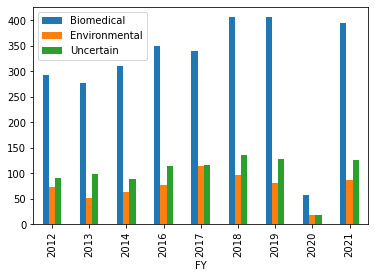

In [98]:
gr = gr.unstack()

ax = gr.plot(kind='bar')

ax.legend(['Biomedical', 'Environmental', 'Uncertain'])

plt.show()

In [102]:
topic_count.loc[topic_count['topic'].str.contains('social, languag, children, attent, communic, deficit, cognit, skill, abil, individu'),'Priority'] = 1
topic_count.loc[topic_count['topic'].str.contains('exposur, environment, risk, matern, factor, mentor, career, dr, risk factor, train'),'Priority'] = 1
topic_count.loc[topic_count['topic'].str.contains('intervent, trial, servic, communiti, implement, core, parent, children, treatment, improv'),'Priority'] = 0
topic_count.loc[topic_count['topic'].str.contains('cell, neuron, regul, gene, protein, mutat, molecular, express, synapt, syndrom'),'Priority'] = 0
topic_count.loc[topic_count['topic'].str.contains('circuit, model, brain, cortex, cortic, neural, activ, neuron, social, function'),'Priority'] = 0
topic_count.loc[topic_count['topic'].str.contains( 'infant, brain, biomark, earli, imag, longitudin, measur, age, month, connect'),'Priority'] = 1
topic_count.loc[topic_count['topic'].str.contains('genom, genet, variant, sequenc, gene, variat, rare, data, risk, diseas'),'Priority'] = 0


In [103]:
gr = topic_count.groupby(['FY', 'Priority'])['Total_Projects'].agg('sum', 'count')
gr

FY    Priority
2012  0.0         293
      1.0         164
2013  0.0         278
      1.0         150
2014  0.0         311
      1.0         153
2016  0.0         349
      1.0         192
2017  0.0         340
      1.0         231
2018  0.0         406
      1.0         233
2019  0.0         406
      1.0         210
2020  0.0         57 
      1.0         37 
2021  0.0         395
      1.0         213
Name: Total_Projects, dtype: int64

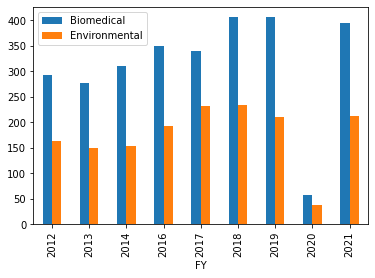

In [104]:
gr = gr.unstack()

ax = gr.plot(kind='bar')

ax.legend(['Biomedical', 'Environmental', 'Uncertain'])

plt.show()

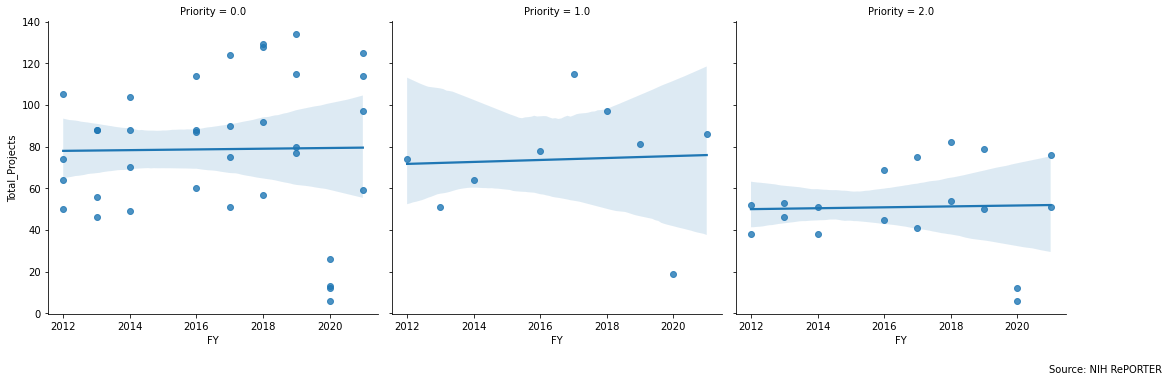

In [70]:
## Barplot function
# https://seaborn.pydata.org/examples/index.html


topic_count_graph = sns.lmplot(x = 'FY', 
                             y = 'Total_Projects', 
                             data = topic_count, 
                             col = 'Priority')


# add a data source 
# xy are measured in percent of axes length, from bottom left of graph:
plt.annotate('Source: NIH RePORTER', xy=(0.95,-0.20), xycoords="axes fraction")

plt.show()

In [71]:
# https://plotly.com/python/line-and-scatter/#line-and-scatter-plots

import plotly

import plotly.express as px
df = topic_count
fig = px.scatter(df,x="FY", y="Total_Projects", 
                 color="topic",
                  hover_data=['Total_Projects'])

fig = px.line(df, x="FY", y="Total_Projects", color="topic", text="Total_Projects")
fig.update_traces(textposition="bottom right")

fig.show()

In [72]:
# Load plotnine
# https://plotnine.readthedocs.io/en/stable/gallery.html 

import plotnine

(ggplot(df, aes(x='FY', y='Total_Projects', fill='topic'))
 + geom_col(stat='identity', position='dodge'))   





ModuleNotFoundError: No module named 'plotnine'

## More iterations - 
- Clusters 

In [73]:
# Import and process data

abs = pd.read_csv('all_autism_abstracts.csv')

# Drop the projects with missing abstracts
abs = abs.dropna(subset = ['ABSTRACT_TEXT'])

abstracts = abs.ABSTRACT_TEXT.values.tolist()

abstracts[0]

"DESCRIPTION (provided by applicant): This proposal is designed to facilitate career development of Jeffrey Anderson, MD PhD as an independent investigator to conduct longitudinal neuroimaging studies of functional MR connectivity in neurodevelopmental and neuropsychiatric disorders, with particular expertise in functional connectivity abnormalities in autism. Although the applicant has extensive mentored research experience during PhD training in electrophysiology of the brain, and extensive neuroradiological training in functional imaging methods, he has not had experience conducting large clinical imaging investigations, requiring patient recruitment and assessment and multivariate statistical analysis of large imaging datasets. The specific research aims of this proposal develop these skills   through a longitudinal study of functional connectivity in autism. There is now extensive evidence that   functional connectivity abnormalities between brain regions are present in autism, wh

In [74]:
stemmer = SnowballStemmer("english")

translator=str.maketrans(string.punctuation, ' ' * len(string.punctuation))

# After
abstracts[0].translate(translator)

# Tokenizing

def tokenize(text):
    translator=str.maketrans(string.punctuation, ' '*len(string.punctuation)) # translator that replaces punctuation with empty spaces
    return [stemmer.stem(i) for i in text.translate(translator).split()]


tokenize(abstracts[0])


stop3 = stop_words + ['provid', 'use', 'studi', 'research', 'genom', 'gene', 'program', 'abstract', 'project', 'e', 'g']

# Tokenize stop words to match
eng_stopwords = [tokenize(s)[0] for s in stop3]


# Let's look at how to use TF-IDF:

vectorizer = CountVectorizer(analyzer= "word", # unit of features are single words rather then phrases of words 
                            tokenizer=tokenize, # function to create tokens
                            ngram_range=(0,2),
                            strip_accents='unicode',
                            stop_words=eng_stopwords,
                            min_df = 0.05,
                            max_df = 0.95)
# Creating bag of words
bag_of_words = vectorizer.fit_transform(abstracts) #transform our corpus is a bag of words 
features = vectorizer.get_feature_names_out()

# Use TfidfTransformer to re-weight bag of words 
transformer = TfidfTransformer(norm = None, smooth_idf = True, sublinear_tf = True)
tfidf = transformer.fit_transform(bag_of_words)

# Fitting LDA model
lda = LatentDirichletAllocation(n_components = 10, learning_method='online') 
doctopic3 = lda.fit_transform(tfidf)

# Displaying the top keywords in each topic
ls_keywords = []
for i,topic in enumerate(lda.components_):
    word_idx = np.argsort(topic)[::-1][:10]
    keywords = ', '.join( features[i] for i in word_idx)
    ls_keywords.append(keywords)
    print(i, keywords)
ls_keywords



0 variant, sequenc, genet, variat, diseas, identifi, rare, whole, analysi, human
1 health, children, public, public health, repetit, children autism, autism, repetit behavior, disord, asd
2 center, core, dr, train, data, scientif, support, resourc, ensur, institut
3 exposur, risk, environment, matern, factor, risk factor, asd, sex, cohort, epigenet
4 connect, imag, brain, biomark, mri, eeg, td, measur, function connect, asd
5 social, process, behavior, neural, deficit, learn, sensori, impair, cognit, visual
6 intellectu, syndrom, x, intellectu disabl, disabl, fragil, fragil x, x syndrom, phenotyp, caus
7 neuron, regul, cell, synapt, mice, mous, model, function, signal, circuit
8 infant, earli, month, languag, risk, children, age, development, trajectori, outcom
9 intervent, trial, outcom, treatment, improv, asd, random, effect, feasibl, evid base


['variant, sequenc, genet, variat, diseas, identifi, rare, whole, analysi, human',
 'health, children, public, public health, repetit, children autism, autism, repetit behavior, disord, asd',
 'center, core, dr, train, data, scientif, support, resourc, ensur, institut',
 'exposur, risk, environment, matern, factor, risk factor, asd, sex, cohort, epigenet',
 'connect, imag, brain, biomark, mri, eeg, td, measur, function connect, asd',
 'social, process, behavior, neural, deficit, learn, sensori, impair, cognit, visual',
 'intellectu, syndrom, x, intellectu disabl, disabl, fragil, fragil x, x syndrom, phenotyp, caus',
 'neuron, regul, cell, synapt, mice, mous, model, function, signal, circuit',
 'infant, earli, month, languag, risk, children, age, development, trajectori, outcom',
 'intervent, trial, outcom, treatment, improv, asd, random, effect, feasibl, evid base']

In [139]:
topic_df3 = pd.DataFrame(doctopic3, columns = ls_keywords)
topic_df3.to_csv("topic_df3.csv")

print("Topic model file saved!")

Topic model file saved!


In [140]:
# Reset the display options
pd.reset_option('^display.', silent=True)

# join together the topics_doc with the abstracts dataframe
topics_project3 = pd.concat([topic_df3,abs],axis=1)
topics_project3.to_csv("topic_project3.csv")
topics_project3.head()



# Idxmax function and axis=1: return the column name of the max value in a row
topic_df3.idxmax(axis=1)

# Reset the display option to see more of the abstract
pd.set_option('display.max_colwidth', 200)

# join the abstract with the topic with the greatest waight
# Rename the first column topic
topics_project_max3 = pd.concat([topic_df3.idxmax(axis=1),abs],axis=1).rename(columns={0:'topic'})

In [141]:
topics_project_max3.head()

,topic,Unnamed: 0.2,APPLICATION_ID,ABSTRACT_TEXT,Unnamed: 0.1,Unnamed: 0,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,ARRA_FUNDED,...,SERIAL_NUMBER,STUDY_SECTION,STUDY_SECTION_NAME,SUBPROJECT_ID,SUFFIX,SUPPORT_YEAR,DIRECT_COST_AMT,INDIRECT_COST_AMT,TOTAL_COST,TOTAL_COST_SUB_PROJECT
0,"languag, typic, typic develop, children, asd, td, social, eye, process, measur",0.0,8522938.0,"DESCRIPTION (provided by applicant): Visual working memory is a fundamental cognitive resource, critical for visuospatial reasoning, guidance of eye movements, and the stability of perception over...",18886.0,18886.0,F32,EY,1.0,N,...,23508.0,ZRG1,Special Emphasis Panel,NaN,NaN,1.0,47114.0,NaN,47114.0,NaN
1,"brain, imag, connect, train, dr, neuroimag, neural, fmri, mri, mentor",1.0,8528613.0,"DESCRIPTION (provided by applicant): Face recognition is an important part of everyday human social behavior, yet the neural circuits underlying face processing are only beginning to be understood...",19227.0,19227.0,K99,EY,5.0,N,...,22671.0,ZEY1,Special Emphasis Panel,NaN,NaN,2.0,83333.0,6667.0,90000.0,NaN
2,"servic, communiti, implement, core, care, support, train, health, trial, intervent",2.0,8441517.0,"DESCRIPTION (provided by applicant): Chromosomal Microarray Analysis (CMA) is a genome-wide technology that allows for identification of genomic alterations, such as deletions and duplications, at...",19380.0,19380.0,R21,HG,5.0,N,...,6560.0,ZRG1,Special Emphasis Panel,NaN,NaN,2.0,125000.0,75000.0,200000.0,NaN
3,"variant, genet, rare, data, sequenc, variat, whole, larg, network, analysi",3.0,8750685.0,"Dr. Bailey-Wilson is collaborating with Drs. Barbara and Ronald Klein, Dr. Priya Duggal, Dr. Alison Klein and Dr. Sudha Iyengar on analyses of existing family data from the Beaver Dam Eye Study (B...",19666.0,19666.0,ZIA,HG,1.0,N,...,200327.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,589154.0,NaN
4,"neuron, synapt, mice, mous, regul, circuit, protein, model, signal, synaps",4.0,8502765.0,DESCRIPTION (provided by applicant): Dendritic spines are small (0.1 - 0.01 femtolitter) excitatory postsynaptic compartments emanating from the dendritic surface. Ca2+ influx into spines activate...,29268.0,29268.0,R01,NS,7.0,N,...,68410.0,ZRG1,Special Emphasis Panel,NaN,NaN,5.0,236425.0,212783.0,449208.0,NaN


In [143]:
# Calculate how many Projects are associated with each topic
topic_count3 = topics_project_max3.groupby(['FY', 'topic'])['APPLICATION_ID'].nunique()

# Convert into a dataframe and reset index
topic_count3 = topic_count3.to_frame().reset_index()

# Rename APPLICATION_ID to Total_Projects_2015
topic_count3.rename(columns={'APPLICATION_ID':'Total_Projects'}, inplace = True)

topic_count3['Topic'] = topic_count3.reset_index().index

# Show full text in a cell
pd.set_option('display.max_colwidth', -1)

topic_count3.to_csv("topic_count3.csv")

topic_count3


<ipython-input-143-3ff19df830e3>:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,FY,topic,Total_Projects,Topic
0,2012.0,"brain, imag, connect, train, dr, neuroimag, neural, fmri, mri, mentor",50,0
1,2012.0,"cell, human, mutat, brain, transcript, sex, stem, express, cell type, stem cell",23,1
2,2012.0,"exposur, environment, risk, matern, factor, risk factor, prenat, immun, asd, birth",20,2
3,2012.0,"infant, earli, month, age, children, intervent, outcom, risk, year, longitudin",36,3
4,2012.0,"languag, typic, typic develop, children, asd, td, social, eye, process, measur",70,4
...,...,...,...,...
85,2021.0,"neuron, synapt, mice, mous, regul, circuit, protein, model, signal, synaps",149,85
86,2021.0,"servic, communiti, implement, core, care, support, train, health, trial, intervent",108,86
87,2021.0,"social, behavior, asd, repetit, anxieti, treatment, repetit behavior, symptom, deficit, social behavior",49,87
88,2021.0,"syndrom, x, phenotyp, fragil x, fragil, intellectu, intellectu disabl, matur, behavior phenotyp, disabl",20,88


In [148]:
topic_count3.loc[topic_count3['topic'].str.contains('servic, communiti, implement, core, care, support, train, health, trial, intervent'),'Priority'] = 1
topic_count3.loc[topic_count3['topic'].str.contains('exposur, environment, risk, matern, factor, risk factor, prenat, immun, asd, birth'),'Priority'] = 0
topic_count3.loc[topic_count3['topic'].str.contains('cell, human, mutat, brain, transcript, sex, stem, express, cell type, stem cell'),'Priority'] = 0
topic_count3.loc[topic_count3['topic'].str.contains('neuron, synapt, mice, mous, regul, circuit, protein, model, signal, synaps'),'Priority'] = 0
topic_count3.loc[topic_count3['topic'].str.contains('social, behavior, asd, repetit, anxieti, treatment, repetit behavior, symptom, deficit, social behavior'),'Priority'] = 1
topic_count3.loc[topic_count3['topic'].str.contains('languag, typic, typic develop, children, asd, td, social, eye, process, measur'),'Priority'] = 2
topic_count3.loc[topic_count3['topic'].str.contains('infant, earli, month, age, children, intervent, outcom, risk, year, longitudi'),'Priority'] = 1
topic_count3.loc[topic_count3['topic'].str.contains('brain, imag, connect, train, dr, neuroimag, neural, fmri, mri, mentor'),'Priority'] = 2
topic_count3.loc[topic_count3['topic'].str.contains('variant, genet, rare, data, sequenc, variat, whole, larg, network, analysi'),'Priority'] = 2
topic_count3.loc[topic_count3['topic'].str.contains('syndrom, x, phenotyp, fragil x, fragil, intellectu, intellectu disabl, matur, behavior phenotyp, disabl'),'Priority'] = 2


In [149]:
topic_count3

,FY,topic,Total_Projects,Topic,Priority
0,2012.0,"brain, imag, connect, train, dr, neuroimag, neural, fmri, mri, mentor",50,0,2.0
1,2012.0,"cell, human, mutat, brain, transcript, sex, stem, express, cell type, stem cell",23,1,0.0
2,2012.0,"exposur, environment, risk, matern, factor, risk factor, prenat, immun, asd, birth",20,2,0.0
3,2012.0,"infant, earli, month, age, children, intervent, outcom, risk, year, longitudin",36,3,1.0
4,2012.0,"languag, typic, typic develop, children, asd, td, social, eye, process, measur",70,4,2.0
...,...,...,...,...,...
85,2021.0,"neuron, synapt, mice, mous, regul, circuit, protein, model, signal, synaps",149,85,0.0
86,2021.0,"servic, communiti, implement, core, care, support, train, health, trial, intervent",108,86,1.0
87,2021.0,"social, behavior, asd, repetit, anxieti, treatment, repetit behavior, symptom, deficit, social behavior",49,87,1.0
88,2021.0,"syndrom, x, phenotyp, fragil x, fragil, intellectu, intellectu disabl, matur, behavior phenotyp, disabl",20,88,2.0


In [150]:
topic_count3.isna().sum()

FY                0
topic             0
Total_Projects    0
Topic             0
Priority          0
dtype: int64

In [151]:

gr3 = topic_count3.groupby(['FY', 'Priority'])['Total_Projects'].agg('sum', 'count')
gr3



FY      Priority
2012.0  0.0         156
        1.0         143
        2.0         158
2013.0  0.0         154
        1.0         129
        2.0         145
2014.0  0.0         177
        1.0         144
        2.0         143
2016.0  0.0         220
        1.0         169
        2.0         152
2017.0  0.0         408
        1.0         322
        2.0         296
2018.0  0.0         488
        1.0         388
        2.0         341
2019.0  0.0         277
        1.0         209
        2.0         217
2020.0  0.0         231
        1.0         195
        2.0         178
2021.0  0.0         248
        1.0         191
        2.0         169
Name: Total_Projects, dtype: int64